In [ ]:
%pip install seaborn
%pip install statsmodels

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

---
#### CRS issue BEGIN
---

In [ ]:
# import geopandas as gpd

# metric_crs = 3857

# # 1. Conflict data: truly in EPSG:4326 → project to 3857
# conflict_gdf = gpd.read_file("data/conflict_points.geojson")
# if conflict_gdf.crs is None:
#     conflict_gdf = conflict_gdf.set_crs(4326)
# conflict_gdf = conflict_gdf.to_crs(metric_crs)

# # 2. National borders: coordinates already look like meters, so treat as 3857 directly
# national_gdf = gpd.read_file("data/admin_borders.geojson")
# national_gdf = national_gdf.set_crs(metric_crs, allow_override=True)

# # 3. Religious borders
# religious_gdf = gpd.read_file("data/religious_borders.geojson")
# religious_gdf = religious_gdf.set_crs(metric_crs, allow_override=True)

# # 4. Ethnic borders
# ethnic_gdf = gpd.read_file("data/ethnic_borders.geojson")
# ethnic_gdf = ethnic_gdf.set_crs(metric_crs, allow_override=True)

# # 5. Colonial borders
# colonial_gdf = gpd.read_file("data/colonial_borders.geojson")
# colonial_gdf = colonial_gdf.set_crs(metric_crs, allow_override=True)

# for name, gdf in [
#     ("conflict_gdf", conflict_gdf),
#     ("national_gdf", national_gdf),
#     ("religious_gdf", religious_gdf),
#     ("ethnic_gdf", ethnic_gdf),
#     ("colonial_gdf", colonial_gdf),
# ]:
#     print(name, "CRS:", gdf.crs, "bounds:", gdf.total_bounds)

In [ ]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# national_gdf.boundary.plot(ax=ax, color="black", linewidth=0.8)
# conflict_gdf.plot(ax=ax, color="red", markersize=2)
# plt.title("Conflict Events + National Borders (EPSG:3857)")
# plt.show()

# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# ethnic_gdf.boundary.plot(ax=ax, color="black", linewidth=0.8)
# conflict_gdf.plot(ax=ax, color="red", markersize=2)
# plt.title("Conflict Events + Ethnic Borders (EPSG:3857)")
# plt.show()

# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# religious_gdf.boundary.plot(ax=ax, color="black", linewidth=0.8)
# conflict_gdf.plot(ax=ax, color="red", markersize=2)
# plt.title("Conflict Events + Religious Borders (EPSG:3857)")
# plt.show()

# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# colonial_gdf.boundary.plot(ax=ax, color="black", linewidth=0.8)
# conflict_gdf.plot(ax=ax, color="red", markersize=2)
# plt.title("Conflict Events + Colonial Borders (EPSG:3857)")
# plt.show()

In [ ]:
# # Issue with CRS when I exported from QGIS
# crs = 3857

# conflict_gdf = gpd.read_file("data/conflict_points.geojson").to_crs(3857)
# # conflict_gdf = gpd.read_file("data/conflict_points.geojson")
# national_gdf = gpd.read_file("data/admin_borders.geojson")
# religious_gdf = gpd.read_file("data/religious_borders.geojson")
# ethnic_gdf = gpd.read_file("data/ethnic_borders.geojson")
# colonial_gdf = gpd.read_file("data/colonial_borders.geojson")


---
#### CRS issue END
---

## Datasets to GDF

In [3]:
conflict_gdf = gpd.read_file("data_3857/conflict_points_3857.geojson")
national_gdf = gpd.read_file("data_3857/national_3857.geojson")
religious_gdf = gpd.read_file("data_3857/religion_3857.geojson")
ethnic_gdf = gpd.read_file("data_3857/ethnic_3857.geojson")
colonial_gdf = gpd.read_file("data_3857/colonial_3857.geojson")

### Sanity Check

In [4]:
# How's that geometry?
print("conflict_gdf CRS:", conflict_gdf.crs)
print("conflict bounds:", conflict_gdf.total_bounds)
print("---")
print("national_gdf CRS:", national_gdf.crs)
print("national bounds:", national_gdf.total_bounds)
print("---")
print("religious_gdf CRS:", religious_gdf.crs)
print("religious_gdf bounds:", religious_gdf.total_bounds)
print("---")
print("ethnic_gdf CRS:", ethnic_gdf.crs)
print("ethnic_gdf bounds:", ethnic_gdf.total_bounds)
print("---")
print("colonial_gdf CRS:", colonial_gdf.crs)
print("colonial_gdf bounds:", colonial_gdf.total_bounds)

conflict_gdf CRS: EPSG:3857
conflict bounds: [-2801132.34683114 -4100462.29554436  7200478.62298131  4478487.18317276]
---
national_gdf CRS: EPSG:3857
national bounds: [-2823164.97539365 -5939113.28059505  6266671.79140006  4514970.68899973]
---
religious_gdf CRS: EPSG:3857
religious_gdf bounds: [-1952113.64131548 -4923971.99368728  6265979.56252748  4487386.90522572]
---
ethnic_gdf CRS: EPSG:3857
ethnic_gdf bounds: [-2823124.06149999 -4139717.8812      6433755.523       4486662.24030003]
---
colonial_gdf CRS: EPSG:3857
colonial_gdf bounds: [-1951740.4647     -5937134.63780005  6063959.18089999  4486661.95679999]


### More Sanity Check
This was done after having some mismatched projections

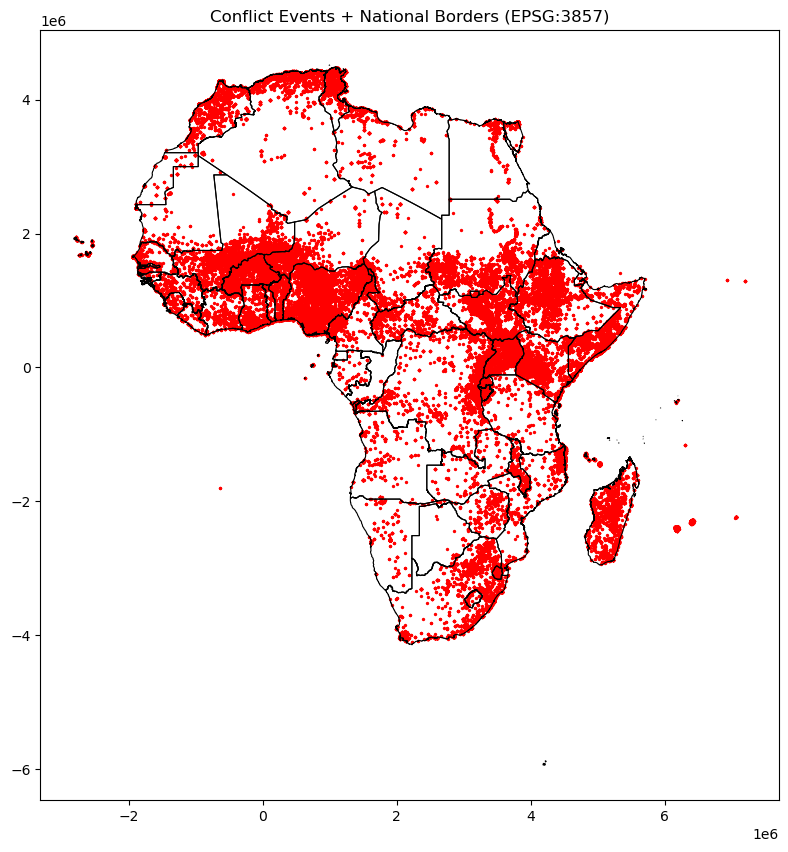

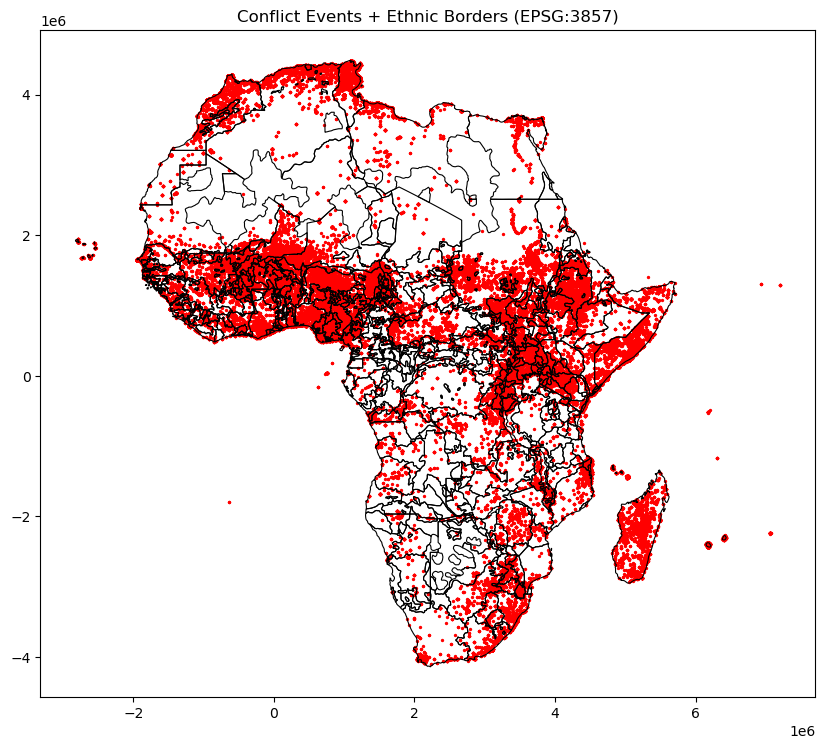

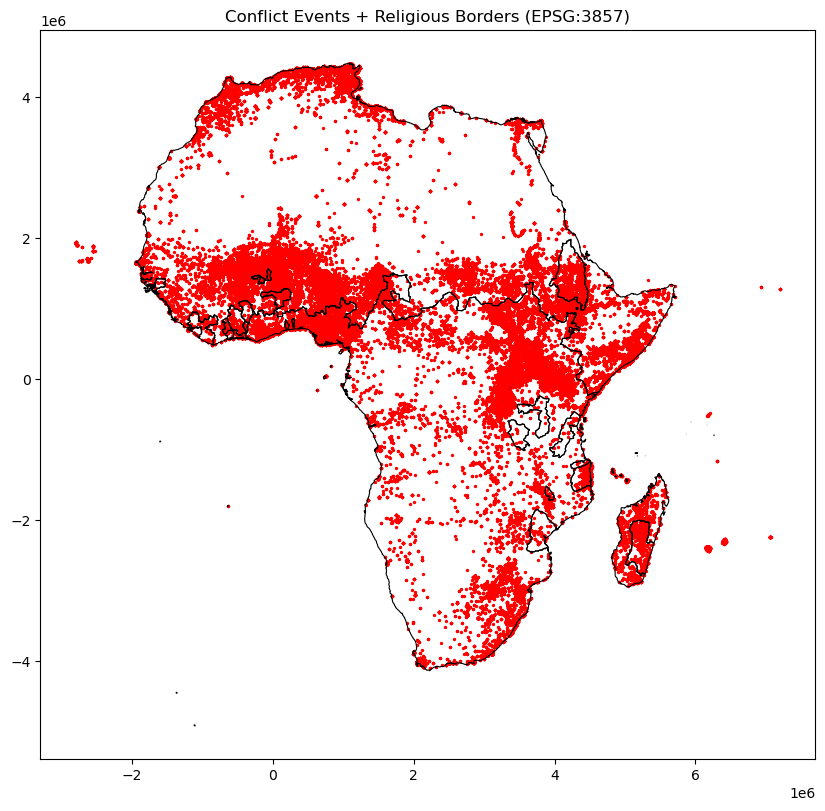

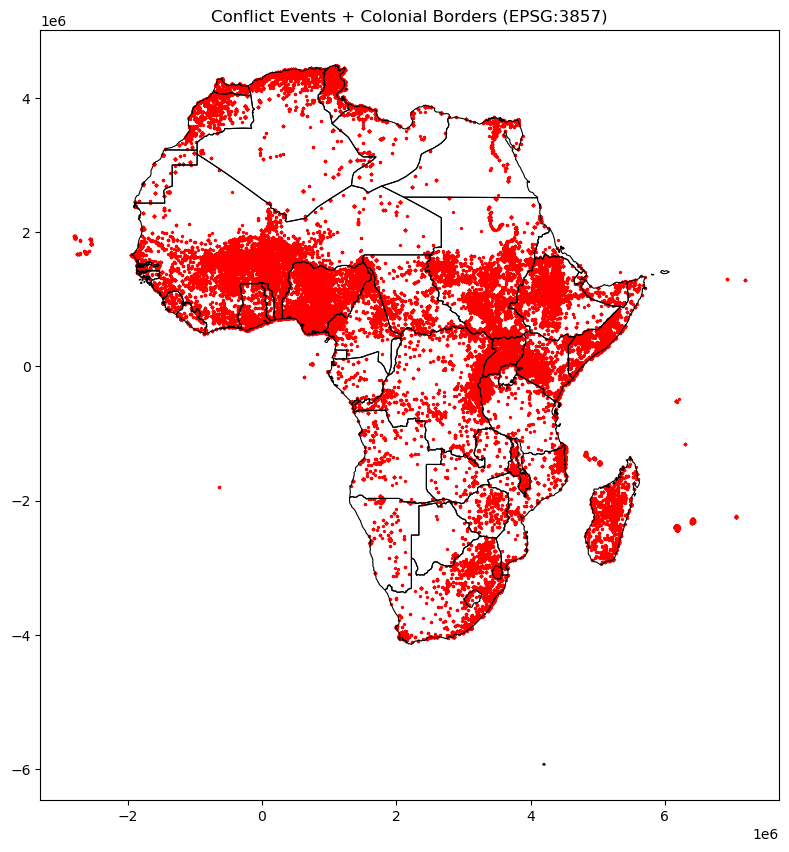

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
national_gdf.boundary.plot(ax=ax, color="black", linewidth=0.8)
conflict_gdf.plot(ax=ax, color="red", markersize=2)
plt.title("Conflict Events + National Borders (EPSG:3857)")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ethnic_gdf.boundary.plot(ax=ax, color="black", linewidth=0.8)
conflict_gdf.plot(ax=ax, color="red", markersize=2)
plt.title("Conflict Events + Ethnic Borders (EPSG:3857)")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
religious_gdf.boundary.plot(ax=ax, color="black", linewidth=0.8)
conflict_gdf.plot(ax=ax, color="red", markersize=2)
plt.title("Conflict Events + Religious Borders (EPSG:3857)")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colonial_gdf.boundary.plot(ax=ax, color="black", linewidth=0.8)
conflict_gdf.plot(ax=ax, color="red", markersize=2)
plt.title("Conflict Events + Colonial Borders (EPSG:3857)")
plt.show()

In [ ]:
# # override the wrong CRS and tell GeoPandas this is actually 3857
# national_gdf = national_gdf.set_crs(3857, allow_override=True)
# religious_gdf = religious_gdf.set_crs(3857, allow_override=True)
# ethnic_gdf = ethnic_gdf.set_crs(3857, allow_override=True)
# colonial_gdf = colonial_gdf.set_crs(3857, allow_override=True)

In [ ]:
# # How 'bout now?
# print("conflict_gdf CRS:", conflict_gdf.crs)
# print("conflict bounds:", conflict_gdf.total_bounds)
# print("---")
# print("national_gdf CRS:", national_gdf.crs)
# print("national bounds:", national_gdf.total_bounds)
# print("---")
# print("religious_gdf CRS:", religious_gdf.crs)
# print("religious_gdf bounds:", religious_gdf.total_bounds)
# print("---")
# print("ethnic_gdf CRS:", ethnic_gdf.crs)
# print("ethnic_gdf bounds:", ethnic_gdf.total_bounds)
# print("---")
# print("colonial_gdf CRS:", colonial_gdf.crs)
# print("colonial_gdf bounds:", colonial_gdf.total_bounds)

### Set CRS for dataset
EPSG: 102022/102023 not in pyproj

Manually create CRS using data from https://epsg.io/102022

In [ ]:
# # Set CRS - for measuring distance
# # crs = 102022
# # since this is not defined in pyproj, do it custom


# from pyproj import CRS

# # Define the CRS using the Proj4 string
# # had AI help on this - I had to do this long time ago
# # it won't change assigned EPSG, but you can reassign (as above), but add it ##ToDo:
# proj4_string = "+proj=aea +lat_0=0 +lon_0=25 +lat_1=20 +lat_2=-23 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs"
# crs = CRS.from_proj4(proj4_string)
# print(crs)

# conflict_gdf.to_crs(crs)
# national_gdf.to_crs(crs)
# religious_gdf.to_crs(crs)
# ethnic_gdf.to_crs(crs)
# colonial_gdf.to_crs(crs)

In [ ]:
# # How 'bout now, this time?
# print("conflict_gdf CRS:", conflict_gdf.crs)
# print("conflict bounds:", conflict_gdf.total_bounds)
# print("---")
# print("national_gdf CRS:", national_gdf.crs)
# print("national bounds:", national_gdf.total_bounds)
# print("---")
# print("religious_gdf CRS:", religious_gdf.crs)
# print("religious_gdf bounds:", religious_gdf.total_bounds)
# print("---")
# print("ethnic_gdf CRS:", ethnic_gdf.crs)
# print("ethnic_gdf bounds:", ethnic_gdf.total_bounds)
# print("---")
# print("colonial_gdf CRS:", colonial_gdf.crs)
# print("colonial_gdf bounds:", colonial_gdf.total_bounds)

### Clean datasets
Removes rows from the GeoDataFrames where geometry is missing (NaN) or empty (GEOMETRY EMPTY)

In [6]:
# quick clean
national_gdf = national_gdf[
    ~national_gdf.geometry.isna() & ~national_gdf.geometry.is_empty
].copy()
religious_gdf = religious_gdf[
    ~religious_gdf.geometry.isna() & ~religious_gdf.geometry.is_empty
].copy()
ethnic_gdf = ethnic_gdf[
    ~ethnic_gdf.geometry.isna() & ~ethnic_gdf.geometry.is_empty
].copy()
colonial_gdf = colonial_gdf[
    ~colonial_gdf.geometry.isna() & ~colonial_gdf.geometry.is_empty
].copy()


## Functions to do the heavy lifting

**add_min_border_distance_sjoin**

Function finds how far each event point is from the nearest polygon boundary using a nearest neighbor spatial join. Returns table with all original columns plus new distance column

New GDF with just borders
- reduces memory footprint,
- avoids extra columns appearing in the join
- speeds up spatial ops

sjoin_nearest does:
- For every event point, find the closest geometry in borders_gdf
- Computes the distance automatically
- Saves distance to new column prefixed with border type (nat, eth, relig, col)

**add_groups_within_threshold**

Function for every conflict point, find all polygons whose areas fall inside a buffer around the event, within max_distance meters, extract unique group names associated with those polygons.

Key  stuff:
- dynamic naming based on function call parameters
- buffer events with distance threshhold
- spatial join - which polygons intersect each buffered event
- for each event index, build a sorted unique list of group names (ie. ethnic groups, or countires)

In [7]:
def add_min_border_distance_sjoin(events_gdf, borders_gdf, prefix):
    """
    Minimum distance from each event point to nearest polygon boundary
    """
    # Make a copy so the original GeoDataFrame is not modified.
    events_gdf = events_gdf.copy()

    # only need border shapes for distance calculation, not any attributes
    # reduces memory footprint,
    # avoids extra columns appearing in the join
    # speeds up spatial ops
    borders_gdf = borders_gdf[["geometry"]].copy()

    # spatial join with nearest feature
    joined_gdf = gpd.sjoin_nearest(
        events_gdf,
        borders_gdf,
        how="left",
        distance_col=f"{prefix}_dist_border"
    )

    # keep only original event columns and distance value
    keep_cols = list(events_gdf.columns) + [f"{prefix}_dist_border"]
    return joined_gdf[keep_cols]


def add_groups_within_threshold(events_gdf, polys_gdf, group_field, prefix, max_distance):
    """
    For each event, find all polygons in polys_gdf whose area lies within
    max_distance (buffer around events) and store unique group names.

    Adds:
        f"{prefix}_groups_within_{max_distance}m" (list of strings)
    """

    # avoid modifying original data
    events_gdf = events_gdf.copy()

    # dynamic naming based on function call parameters
    colname = f"{prefix}_groups_within_{max_distance}m"

    # just  geometry and group field
    polys_gdf = polys_gdf[[group_field, "geometry"]].copy()

    # buffer events with distance threshhold
    buffer_gdf = events_gdf[["geometry"]].copy()
    buffer_gdf["geometry"] = buffer_gdf.geometry.buffer(max_distance)

    # spatial join - which polygons intersect each buffered event
    joined_gdf = gpd.sjoin(
        buffer_gdf,
        polys_gdf,
        how="left",
        predicate="intersects"
    )

    # for each event index, build a sorted unique list of group names
    groups_per_event = (
        joined_gdf
        .groupby(joined_gdf.index)[group_field]
        .apply(lambda s: sorted(s.dropna().unique()))
    )

    # initialize with empty lists for all events
    events_gdf[colname] = [[] for _ in range(len(events_gdf))]

    # assign lists back by matching index
    events_gdf.loc[groups_per_event.index, colname] = groups_per_event

    return events_gdf

### Call the fucntions

The next 4 code blocks are the same except for the border dataset that is used. They call the above functions 

There are 4 border groups
- national
- ethnic
- religious
- colonizer

- {}_group_name = the column in the border dataset that holds group info
- prefix = for columns added by each function
- DIST_THRESHOLD = distance for point buffer


Original plan was to loop through each border group, but for clarity and debugging, I decided against it. 

In [ ]:
# National borders
national_group_name = "shapeName"
prefix="nat"
DIST_THRESHOLD = 100_000  # 100 km

nat_events_gdf = add_min_border_distance_sjoin(
    events_gdf=conflict_gdf,
    borders_gdf=national_gdf,
    prefix=prefix
)

nat_events_gdf = add_groups_within_threshold(
    events_gdf=nat_events_gdf,
    polys_gdf=national_gdf,
    group_field=national_group_name,
    prefix=prefix,
    max_distance=DIST_THRESHOLD
)

nat_events_gdf[f"nat_group_count_{DIST_THRESHOLD}m"] = (
    nat_events_gdf[f"nat_groups_within_{DIST_THRESHOLD}m"].apply(len)
)

nat_events_gdf[[
    "geometry",
    "nat_dist_border",
    f"nat_groups_within_{DIST_THRESHOLD}m",
    f"nat_group_count_{DIST_THRESHOLD}m"
]].head()


# optional
nat_events_gdf.to_csv("data/nat_events_gdf.csv", index=False)

,geometry,nat_dist_border,nat_groups_within_100000m,nat_group_count_100000m
0,POINT (-906919.891 3207557.382),0.0,"[Algeria, Mauritania, Morocco, Western Sahara]",4
1,POINT (344645.143 4403066.753),0.0,[Algeria],1
2,POINT (357558.204 4399177.833),0.0,[Algeria],1
3,POINT (62227.595 4265178.795),0.0,[Algeria],1
4,POINT (-71467.113 4258186.325),0.0,[Algeria],1


In [ ]:
# Ethnic borders
ethnic_group_name = "Ethnic_g"
prefix = "ethnic"
ETHNIC_DIST_THRESHOLD = 100_000  # 100 km 

ethnic_events_gdf = add_min_border_distance_sjoin(
    events_gdf=conflict_gdf,
    borders_gdf=ethnic_gdf,
    prefix=prefix
)

ethnic_events_gdf = add_groups_within_threshold(
    events_gdf=ethnic_events_gdf,
    polys_gdf=ethnic_gdf,
    group_field=ethnic_group_name,
    prefix=prefix,
    max_distance=ETHNIC_DIST_THRESHOLD
)

ethnic_events_gdf[f"ethnic_group_count_{ETHNIC_DIST_THRESHOLD}m"] = (
    ethnic_events_gdf[f"ethnic_groups_within_{ETHNIC_DIST_THRESHOLD}m"].apply(len)
)

ethnic_events_gdf[[
    "geometry",
    "ethnic_dist_border",
    f"ethnic_groups_within_{ETHNIC_DIST_THRESHOLD}m",
    f"ethnic_group_count_{ETHNIC_DIST_THRESHOLD}m"
]].head()

# optional
ethnic_events_gdf.to_csv("data/ethnic_events_gdf.csv", index=False)

,geometry,ethnic_dist_border,ethnic_groups_within_100000m,ethnic_group_count_100000m
0,POINT (-906919.891 3207557.382),0.0,"[Algeria Arabs, Morocco Arabs, West Sahara Arabs]",3
1,POINT (344645.143 4403066.753),0.0,"[Algeria Arabs, Kabiles]",2
2,POINT (357558.204 4399177.833),0.0,"[Algeria Arabs, Kabiles]",2
3,POINT (62227.595 4265178.795),0.0,[Algeria Arabs],1
4,POINT (-71467.113 4258186.325),0.0,[Algeria Arabs],1


In [ ]:
# Religious borders
religious_group_name = "highrelig"
prefix="relig"
RELIG_DIST_THRESHOLD = 100_000  # 100 km 

relig_events_gdf = add_min_border_distance_sjoin(
    events_gdf=conflict_gdf,
    borders_gdf=religious_gdf,
    prefix=prefix
)

relig_events_gdf = add_groups_within_threshold(
    events_gdf=relig_events_gdf,
    polys_gdf=religious_gdf,
    group_field=religious_group_name,
    prefix=prefix,
    max_distance=RELIG_DIST_THRESHOLD
)

relig_events_gdf[f"relig_group_count_{RELIG_DIST_THRESHOLD}m"] = (
    relig_events_gdf[f"relig_groups_within_{RELIG_DIST_THRESHOLD}m"].apply(len)
)

relig_events_gdf[[
    "geometry",
    "relig_dist_border",
    f"relig_groups_within_{RELIG_DIST_THRESHOLD}m",
    f"relig_group_count_{RELIG_DIST_THRESHOLD}m"
]].head()

# optional
relig_events_gdf.to_csv("data/relig_events_gdf.csv", index=False)

,geometry,relig_dist_border,relig_groups_within_100000m,relig_group_count_100000m
0,POINT (-906919.891 3207557.382),0.0,[Muslims],1
1,POINT (344645.143 4403066.753),0.0,[Muslims],1
2,POINT (357558.204 4399177.833),0.0,[Muslims],1
3,POINT (62227.595 4265178.795),0.0,[Muslims],1
4,POINT (-71467.113 4258186.325),0.0,[Muslims],1


In [ ]:
# Colonial borders
colonizer_group_name = "Colonizer"
prefix="colonial"
COLONIAL_DIST_THRESHOLD = 100_000  # 100 km 

colonial_events_gdf = add_min_border_distance_sjoin(
    events_gdf=conflict_gdf,
    borders_gdf=colonial_gdf,
    prefix=prefix
)

colonial_events_gdf = add_groups_within_threshold(
    events_gdf=colonial_events_gdf,
    polys_gdf=colonial_gdf,
    group_field=colonizer_group_name,
    prefix=prefix,
    max_distance=COLONIAL_DIST_THRESHOLD
)

colonial_events_gdf[f"colonial_group_count_{COLONIAL_DIST_THRESHOLD}m"] = (
    colonial_events_gdf[f"colonial_groups_within_{COLONIAL_DIST_THRESHOLD}m"].apply(len)
)

colonial_events_gdf[[
    "geometry",
    "colonial_dist_border",
    f"colonial_groups_within_{COLONIAL_DIST_THRESHOLD}m",
    f"colonial_group_count_{COLONIAL_DIST_THRESHOLD}m"
]].head()

# optional
colonial_events_gdf.to_csv("data/colonial_events_gdf.csv", index=False)

,geometry,colonial_dist_border,colonial_groups_within_100000m,colonial_group_count_100000m
0,POINT (-906919.891 3207557.382),0.0,"[France, Spain]",2
1,POINT (344645.143 4403066.753),0.0,[France],1
2,POINT (357558.204 4399177.833),0.0,[France],1
3,POINT (62227.595 4265178.795),0.0,[France],1
4,POINT (-71467.113 4258186.325),0.0,[France],1


### Validate me!

Just a quick sanity check for results

In [14]:

print(f"National borders \n {nat_events_gdf.sample(n=15)}\n####\n")
print(f"Ethnic borders \n {ethnic_events_gdf.sample(n=15)}\n####\n")
print(f"Religious borders \n {relig_events_gdf.sample(n=15)}\n####\n")
print(f"Colonial borders \n {colonial_events_gdf.sample(n=15)}")

National borders 
            fid EVENT_ID_CNTY        EVENT_DATE  YEAR  TIME_PRECISION  \
84480    84481        MAA950  07-November-2020  2020               2   
32704    32705      DRC27593  01-December-2022  2022               1   
23293    23294      CEN48336      09-July-2021  2021               1   
170942  170943      SUD24024  30-November-2023  2023               1   
142708  142709      SOM31739    10-August-2020  2020               1   
119858  119859      NIG20800       23-May-2021  2021               1   
126964  126965       SEN1756       29-May-2023  2023               1   
126469  126470        RWA822  19-November-2022  2022               1   
176363  176364      SUD19319     02-March-2023  2023               1   
45244    45245        BEN915  27-February-2023  2023               1   
202219  202220       BFO4435  12-February-2021  2021               1   
15437    15438       CAO7107  25-February-2023  2023               2   
18623    18624       CAO5473    03-August-202


### Combine data into single GDF

In [15]:
# reset index because it's bitey
conflict_gdf = conflict_gdf.reset_index(drop=True)
nat_events_gdf = nat_events_gdf.reset_index(drop=True)
ethnic_events_gdf = ethnic_events_gdf.reset_index(drop=True)
relig_events_gdf = relig_events_gdf.reset_index(drop=True)
colonial_events_gdf = colonial_events_gdf.reset_index(drop=True)

Column names assume we keep 100 km threshhold

In [ ]:
# start from the raw conflict events
events_gdf = conflict_gdf.copy()

# National
events_gdf["nat_dist_border"] = nat_events_gdf["nat_dist_border"]
events_gdf["nat_groups_within_100000m"] = nat_events_gdf["nat_groups_within_100000m"]
events_gdf["nat_group_count_100000m"] = nat_events_gdf["nat_group_count_100000m"]

# Ethnic
events_gdf["ethnic_dist_border"] = ethnic_events_gdf["ethnic_dist_border"]
events_gdf["ethnic_groups_within_100000m"] = ethnic_events_gdf["ethnic_groups_within_100000m"]
events_gdf["ethnic_group_count_100000m"] = ethnic_events_gdf["ethnic_group_count_100000m"]

# Religious
events_gdf["relig_dist_border"] = relig_events_gdf["relig_dist_border"]
events_gdf["relig_groups_within_100000m"] = relig_events_gdf["relig_groups_within_100000m"]
events_gdf["relig_group_count_100000m"] = relig_events_gdf["relig_group_count_100000m"]

# Colonial
events_gdf["colonial_dist_border"] = colonial_events_gdf["colonial_dist_border"]
events_gdf["colonial_groups_within_100000m"] = colonial_events_gdf["colonial_groups_within_100000m"]
events_gdf["colonial_group_count_100000m"] = colonial_events_gdf["colonial_group_count_100000m"]

events_gdf.head()

# optional
events_gdf.to_csv("data/conflict_border_features.csv", index=False)

# out_path = "data/conflict_with_border_features.geojson"
# events_gdf.to_file(out_path, driver="GeoJSON")

Prep for regression

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = events_gdf.copy()

# drop geometry 
if "geometry" in df.columns:
    df = df.drop(columns="geometry")

# ACLED fatalities column
y_var = "FATALITIES"

# distance predictors
distance_vars = [
    "nat_dist_border",
    "ethnic_dist_border",
    "relig_dist_border",
    "colonial_dist_border",
]

# modeling df
reg_df = df[[y_var] + distance_vars].replace([np.inf, -np.inf], np.nan).dropna()

In [18]:
y = reg_df[y_var]
X = reg_df[distance_vars]

# constant term (intercept)
X = sm.add_constant(X)

In [19]:
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:             FATALITIES   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     18.10
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           7.09e-15
Time:                        19:41:22   Log-Likelihood:            -6.6979e+05
No. Observations:              203601   AIC:                         1.340e+06
Df Residuals:                  203596   BIC:                         1.340e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.3524 

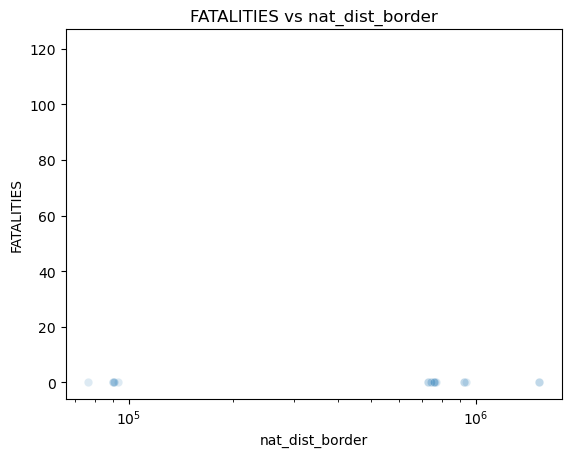

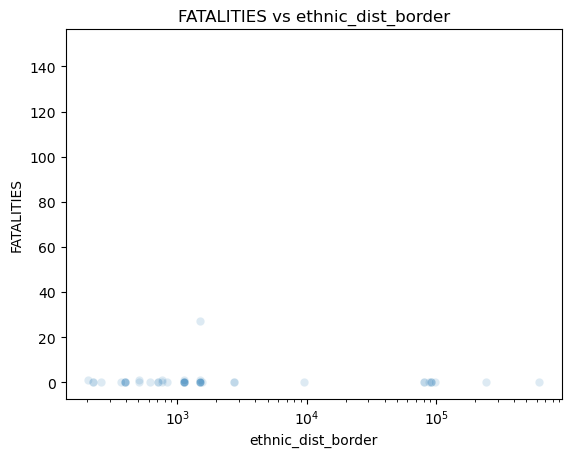

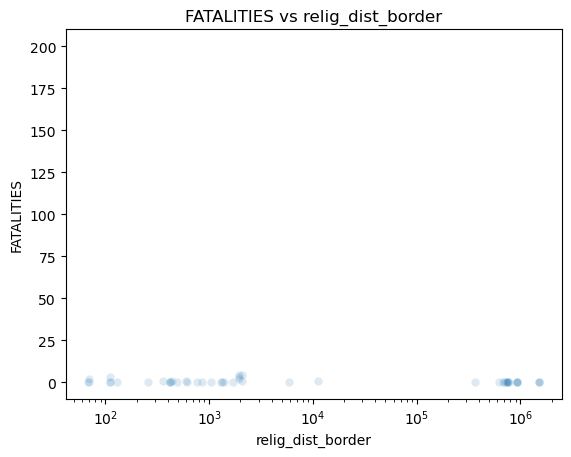

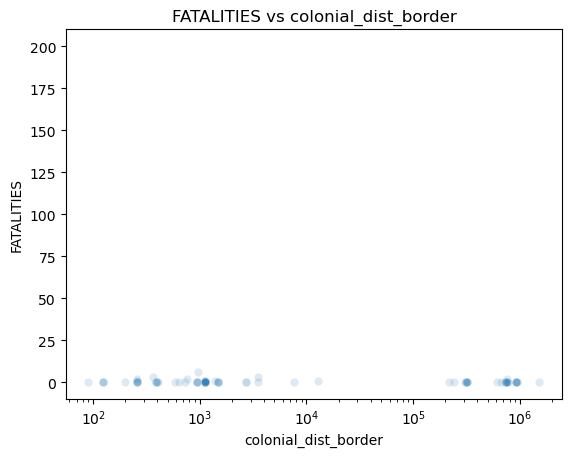

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for v in distance_vars:
    sns.scatterplot(data=reg_df.sample(3000), x=v, y=y_var, alpha=0.15)
    plt.title(f"FATALITIES vs {v}")
    plt.xscale("log")     # distances often benefit from log scale
    plt.show()